In [1]:
#Needed in general


import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../Scripts')


# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from astropy import units as u
from astropy import constants as const

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# print(fs)

import astropy
import seaborn as sns


from astropy import units as u
from astropy import constants as c


### Print some of the DCO seeds for low and solar like metallicity. I will then evolve binaries with these seeds and plot them in the next block

In [2]:
DCOtype='BBH'

# for BPSmodelName in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',  'P', 'Q', 'R', 'S', 'T']:
BPSmodelName = 'A'

print(' -----   Now at model ', BPSmodelName, ' -------')

#         mssfr = '112' # mssfr that matches LIGO observed rates.
# path for files 
path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

# read in data 
fdata = h5.File(path)


M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
MRR_mask = (M2BH>M1BH) # THe BH formed from the M2@ZAMS is more massive at DCO merger than the BH formed at M1@ZAMS

DCOseeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
Metallicity = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
samplingPhase = fdata['systems']['samplingPhase'][...].squeeze()

print(np.unique(Metallicity))
# seeds solar 
mask_MRR_solar = (MRR_mask==1) & (Metallicity==0.01416)
mask_MRR_0_1solar = (MRR_mask==1) & (Metallicity==0.00101)


# seeds = np.in1d()



print('Z = Zsun MRR seeds are:', DCOseeds[mask_MRR_solar])
print(samplingPhase[mask_MRR_solar])
print('Z = Zsun/10 MRR seeds are:', DCOseeds[mask_MRR_0_1solar][0:10])
print(samplingPhase[mask_MRR_0_1solar])



print(np.sum(np.in1d(DCOseeds[mask_MRR_solar],DCOseeds[mask_MRR_0_1solar] )))


 -----   Now at model  A  -------
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 0.00019 0.00022 0.00024
 0.00027 0.0003  0.00034 0.00037 0.00042 0.00047 0.00052 0.00058 0.00065
 0.00073 0.00081 0.0009  0.00101 0.00113 0.00126 0.0014  0.00157 0.00175
 0.00195 0.00218 0.00243 0.00272 0.00303 0.00339 0.00378 0.00422 0.00471
 0.00526 0.00587 0.00655 0.00732 0.00817 0.00912 0.01018 0.01137 0.01269
 0.01416 0.01581 0.01765 0.01971 0.0244  0.02705]
Z = Zsun MRR seeds are: [4505003997 4505024245 4540016235 4525005018 4525060549 4520056107
 4535069217 4555009662 4580000775 4580007538 4580014199 4580026096
 4580026206 4580028546 4580029535 4595005996 4595017897 4565014413
 4565027532 4590005294 4590011833 4590027903 4590029561 4550029250
 4550029758 4550029943 4575000992 4575003137 4575014171 4575025123
 4575025359 4575025394 4560003020 4560005286 4560020027 4560022143
 4560024346 4560024766 4570022527 4585029566 4585030194]
[1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [12]:
! ls ../detailedEvolutionData/fiducial/

Z_0.00101 Z_0.01416


# plotting the seeds above 

In [15]:
def plotDetailedEvolution2panel2seeds(seed, x_m1, x_m2, ylabel, dirname, metallicityList, verbose=False): # x1, x2, x3,
    """    """
        
    metallicityLabels = [r'$Z \approx 0.001$', r'$Z \approx Z_{\odot}$' ]
    
    f, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    for ind_ax, axarr in enumerate([ax[0], ax[1]]):
        
        pathList = '../detailedEvolutionData/'+ dirname+'/Z_' + str(metallicityList[ind_ax]) +'/' + str(seed[ind_ax])
        dataDetailed = pathList + '/dataOutput_0.dat'

        data = np.genfromtxt(dataDetailed, skip_header=1, names=True) 

        # obtaingiven parameters
        param_m1 = data[x_m1]
        param_m2 = data[x_m2]

        # we always need the parameters below
        StellarType1 = data['S1type']
        StellarType2 = data['S2type']
        time = data['time']
        

        # obtain mask for when Stellar Type changes 
        maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
        maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]

        ind_whereBH = np.argwhere(StellarType1[:-1] != StellarType1[1:])
        
    
        # plot given parameters for star 1 and star 2
        if (x_m1=='mass1') & (x_m2=='mass2'):
            axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = r'$M_{\rm{*,A}}; \ \textbf{primary}$')
            axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = r'$M_{\rm{*,B}}; \ \textbf{secondary}$')
        elif (x_m1=='Radius1') & (x_m2=='Radius2'):
            axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = r'$R_{\rm{*,A}}; \ \textbf{primary}$')
            axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = r'$R_{\rm{*,B}}; \ \textbf{secondary}$')
            
            separation = data['separation']
            RocheLobe1 = np.asarray(data['RocheLobe1a'])*separation
            RocheLobe2 = np.asarray(data['RocheLobe2a'])*separation
            
            axarr.plot(time, RocheLobe1, lw = 4, c=colorlist[0], label = r'$R_{\rm{L,A}}; \ \textbf{primary}$', ls='--')
            axarr.plot(time, RocheLobe2, lw = 4, c=colorlist[1], label = r'$R_{\rm{L,B}}; \ \textbf{secondary}$', ls='--')            
            axarr.plot(time, separation, lw = 4, c='k', label = r'$\textbf{separation} \ \textbf{[au]}$', ls=':') 
            
            

        # plot stellartype + a scatter point when steller type changes
        axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[0],\
                      marker='o', edgecolors =None, zorder=1000)
        axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[1],\
                      marker='o', edgecolors =None, zorder = 1000)
        

        
        ind_time_BH = ind_whereBH[-1]+1
        # and for the last one
        axarr.scatter(time[ind_time_BH], param_m1[ind_time_BH], s=120, c=colorlist[0],\
                      marker='o', edgecolors =None, zorder=1000)
        axarr.scatter(time[-1], param_m2[-1], s=120, c=colorlist[1],\
                      marker='o', edgecolors =None, zorder = 1000)
        

        x_offset, y_offset = .0, .0

        time_prev_1 = 0
        time_prev_2 = 0
        print('ST1:', StellarType1[maskST1changes][:])
        print('ST2:', StellarType2[maskST2changes][:])
        

        
        MRR_time = time[maskST1changes][0]
        x_around_MRR = np.linspace(MRR_time-0.1, MRR_time+0.1, 10)        
        if (x_m1=='mass1') & (x_m2=='mass2'):
            axarr.fill_between(x_around_MRR, y1=0*np.ones(10), y2=100*np.ones(10), color='lightgray', alpha=0.6, zorder=0)
            axarr.text(x=MRR_time-0.1, y=6.5, s='MRR occurs', fontsize=14, va='bottom', ha='right', rotation=90 )
        elif (x_m1=='Radius1') & (x_m2=='Radius2'):
            axarr.fill_between(x_around_MRR, y1=0*np.ones(10), y2=1000000*np.ones(10), color='lightgray', alpha=0.6, zorder=0)
            axarr.text(x=MRR_time-0.1, y=1, s='MRR occurs', fontsize=14, va='bottom', ha='right', rotation=90 )

        
        if verbose==True:
            print('---masses printed---')
            print('start', param_m1[0], param_m2[0])
            print('start separation: ', data['separation'][0])

            print('final', param_m1[-1], param_m2[-1])
            print('final separation: ', data['separation'][-1])
            print()

            for ind, ST in enumerate(StellarType1[maskST1changes][:]):
                print('time 1=', time[maskST1changes][ind]  )           
                print('mass 1 = ', param_m1[maskST1changes][ind])
                print('mass 2 = ', param_m2[maskST1changes][ind])
                print('ST 1 = ', StellarType1[maskST1changes][ind])
                print('ST 2 = ', StellarType2[maskST1changes][ind])
                print()

            for ind, ST in enumerate(StellarType1[maskST1changes][:]):

                print()
                print('time 2=',  time[maskST2changes][ind] )
                print('mass 1 = ', param_m1[maskST2changes][ind])
                print('mass 2 = ', param_m2[maskST2changes][ind])
                print('ST 1 = ', StellarType1[maskST2changes][ind])
                print('ST 2 = ', StellarType2[maskST2changes][ind])

            print('--- end --- ')
#         for ind, ST in enumerate(StellarType1[maskST1changes][:]):
#             if ind==0:
#                 continue
#             else:
#                 time_this_1 = time[maskST1changes][ind] 
#                 time_this_2 = time[maskST2changes][ind] 
#                 if abs(time_this_1 - time_prev_1) >= 1./3:
#                     axarr.text(time[maskST1changes][ind]-(x_offset+.0), param_m1[maskST1changes][ind]+(y_offset), \
#                                s=ST_dict[str(int(ST))] , fontsize = 16)
#                 else:
#                     axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.0), \
#                        s=ST_dict[str(int(ST))] , fontsize = 16)
#                 if abs(time_this_2 - time_prev_2) >= 1./2:
#                     axarr.text(time[maskST2changes][ind] -(x_offset+.0), param_m2[maskST2changes][ind]+(y_offset), \
#                                s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
#                 else:
#                     axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.0), \
#                        s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
#             time_prev_1 = time[maskST1changes][ind] 
#             time_prev_2 = time[maskST2changes][ind] 
    #     axarr.text(0.8, 0.9, r'' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')

        # make plot look nicer with code below
        if ind_ax==1:
            axarr.legend(fontsize = 22 , loc = 'lower left')

        axarr.grid(which='both')
        axarr.grid(which='minor', alpha=0.2)
        axarr.grid(which='major', alpha=0.5) 

        axarr.grid(True)
        axarr.tick_params(labelsize=24)
        
        
        
        
        axarr.set_ylim(5, 90)
        axarr.set_xlim(0,7.8)
        
        if x_m1=='S1type':
            axarr.set_ylim(0, 16)
        elif (x_m1=='Radius1') & (x_m2=='Radius2'):
            axarr.set_ylim(0.1, 50000)
            axarr.set_yscale('log')
            
        if x_m1=='mass1': 
            axarr.text(0.2, 85,  s=metallicityLabels[ind_ax], fontsize = 24, va='top', ha='left')

                  
        layoutAxes(ax=axarr, nameX=r'$\textbf{Time} \ [\rm{Myr}]$', nameY=r'$\textbf{%s}$'%ylabel[ind_ax], setMinor=True, labelpad=5)    
        if ind_ax==0:
            axarr.set_xticklabels( () )

            

    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./detailedPlots/' + x_m1+ x_m2 + '_' + str(dirname)  + '_' + str(seed[0]) +'_' + str(seed[1]) + 'paper.pdf')
    plt.show()
    
    
    
    
    

 ### SEED 4540016235

ST1: [1. 2. 7.]
ST2: [1. 2. 7.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:168: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


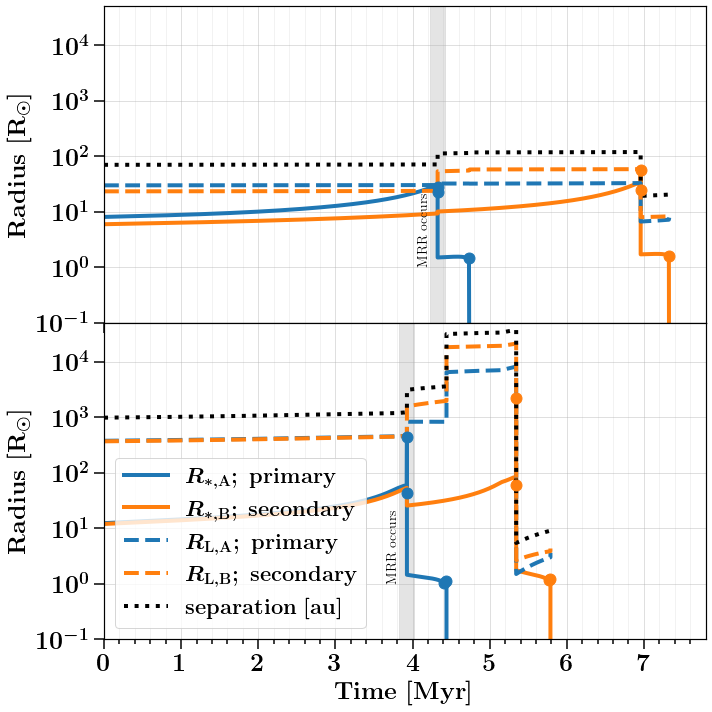

ST1: [1. 2. 7.]
ST2: [1. 2. 7.]
---masses printed---
start 56.4411027 32.71187811
start separation:  70.0972413
final 18.03330175 22.02392759
final separation:  21.70574696

time 1= 4.324682898
mass 1 =  55.18492865
mass 2 =  32.54964328
ST 1 =  1.0
ST 2 =  1.0

time 1= 4.325387924
mass 1 =  55.18440255
mass 2 =  32.54959664
ST 1 =  2.0
ST 2 =  1.0

time 1= 4.731875436
mass 1 =  20.07293816
mass 2 =  65.93629802
ST 1 =  7.0
ST 2 =  1.0


time 2= 6.956877404
mass 1 =  18.03310564
mass 2 =  64.54480421
ST 1 =  14.0
ST 2 =  1.0

time 2= 6.957945401
mass 1 =  18.03310564
mass 2 =  64.54379388
ST 1 =  14.0
ST 2 =  2.0

time 2= 7.323793215
mass 1 =  18.03330175
mass 2 =  24.50582674
ST 1 =  14.0
ST 2 =  7.0
--- end --- 
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
---masses printed---
start 67.33751654 64.06100552
start separation:  979.6152653
final 7.809553801 11.47103787
final separation:  10.44227085

time 1= 3.92431403
mass 1 =  52.70066782
mass 2 =  52.22919626
ST 1 =  1.0
ST 2 =  1.0

time 1

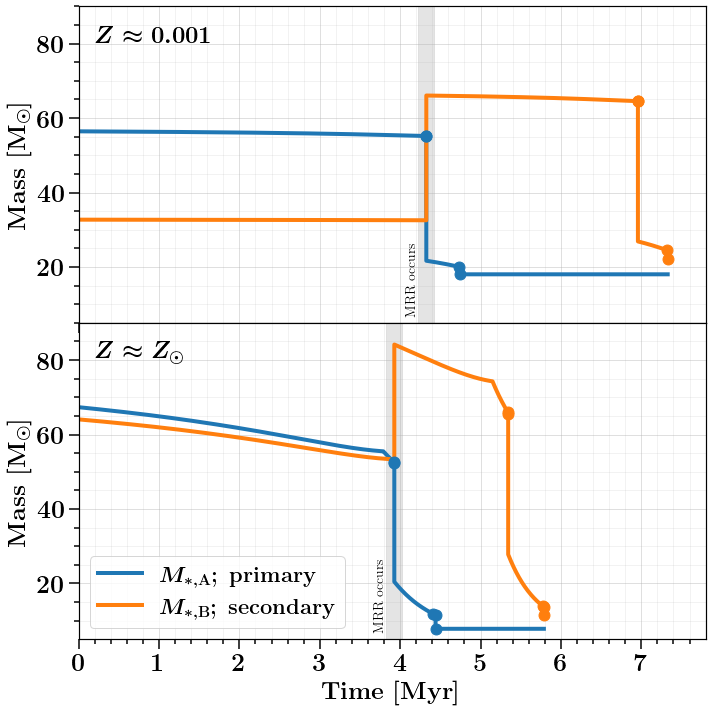

In [19]:
# solar like metallicity 

colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'gold']

dirname ='fiducial'
metallicityList = [0.00101,0.01416]
seedList = [2105001147, 4505024245]

plotDetailedEvolution2panel2seeds(seed=seedList, x_m1='Radius1', x_m2='Radius2',ylabel=[r'Radius $[\rm{R}_{\odot}]$', r'Radius $[\rm{R}_{\odot}]$'],\
                            dirname=dirname, metallicityList=metallicityList)

plotDetailedEvolution2panel2seeds(seed=seedList, x_m1='mass1', x_m2='mass2',  ylabel=[r'Mass $[\rm{M}_{\odot}]$', r'Mass $[\rm{M}_{\odot}]$'],\
                            dirname=dirname, metallicityList=metallicityList, verbose=True)








# EXTRA FIGURES

In [8]:
def plotDetailedEvolutionPerPanel(seed, x_m1, x_m2, ylabel, dirname, metallicityList, verbose=False): # x1, x2, x3,
    """    """
        
    metallicityLabels = [r'$Z \approx 0.001$', r'$Z \approx Z_{\odot}$' ]
    
    f, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    for ind_ax, axarr in enumerate([ax[0], ax[1]]):
        
        pathList = '../detailedEvolutionData/'+ dirname+'/Z_' + str(metallicityList[ind_ax]) +'/' + str(seed[ind_ax])
        dataDetailed = pathList + '/dataOutput_0.dat'

        data = np.genfromtxt(dataDetailed, skip_header=1, names=True) 

        # obtaingiven parameters
        param_m1 = data[x_m1[ind_ax]]
        param_m2 = data[x_m2[ind_ax]]

        # we always need the parameters below
        StellarType1 = data['S1type']
        StellarType2 = data['S2type']
        time = data['time']
        

        # obtain mask for when Stellar Type changes 
        maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
        maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]

        ind_whereBH = np.argwhere(StellarType1[:-1] != StellarType1[1:])
        
    
        # plot given parameters for star 1 and star 2
        if (x_m1[ind_ax]=='mass1') & (x_m2[ind_ax]=='mass2'):
            axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = r'$M_{\rm{*,A}}; \ \textbf{primary}$')
            axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = r'$M_{\rm{*,B}}; \ \textbf{secondary}$')
        elif (x_m1[ind_ax]=='Radius1') & (x_m2[ind_ax]=='Radius2'):
            axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = r'$R_{\rm{*,A}}; \ \textbf{primary}$')
            axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = r'$R_{\rm{*,B}}; \ \textbf{secondary}$')
            
            separation = data['separation']
            RocheLobe1 = np.asarray(data['RocheLobe1a'])*separation
            RocheLobe2 = np.asarray(data['RocheLobe2a'])*separation
            
            axarr.plot(time, RocheLobe1, lw = 4, c=colorlist[0], label = r'$R_{\rm{L,A}}; \ \textbf{primary}$', ls='--')
            axarr.plot(time, RocheLobe2, lw = 4, c=colorlist[1], label = r'$R_{\rm{L,B}}; \ \textbf{secondary}$', ls='--')            
            axarr.plot(time, separation, lw = 4, c='k', label = r'$\textbf{separation} \ \textbf{[au]}$', ls=':') 
            
            

        # plot stellartype + a scatter point when steller type changes
        axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[0],\
                      marker='o', edgecolors =None, zorder=1000)
        axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[1],\
                      marker='o', edgecolors =None, zorder = 1000)
        

        
        ind_time_BH = ind_whereBH[-1]+1
        # and for the last one
        axarr.scatter(time[ind_time_BH], param_m1[ind_time_BH], s=120, c=colorlist[0],\
                      marker='o', edgecolors =None, zorder=1000)
        axarr.scatter(time[-1], param_m2[-1], s=120, c=colorlist[1],\
                      marker='o', edgecolors =None, zorder = 1000)
        

        x_offset, y_offset = .0, .0

        time_prev_1 = 0
        time_prev_2 = 0
        print('ST1:', StellarType1[maskST1changes][:])
        print('ST2:', StellarType2[maskST2changes][:])
        

        
        MRR_time = time[maskST1changes][0]
        x_around_MRR = np.linspace(MRR_time-0.3, MRR_time+0.3, 10)        
        if (x_m1[ind_ax]=='mass1') & (x_m2[ind_ax]=='mass2'):
            axarr.fill_between(x_around_MRR, y1=0*np.ones(10), y2=1000*np.ones(10), color='lightgray', alpha=0.6, zorder=0)
            axarr.text(x=MRR_time-0.3, y=6.5, s='MRR occurs', fontsize=14, va='bottom', ha='right', rotation=90 )
        elif (x_m1[ind_ax]=='Radius1') & (x_m2[ind_ax]=='Radius2'):
            axarr.fill_between(x_around_MRR, y1=0*np.ones(10), y2=1000000*np.ones(10), color='lightgray', alpha=0.6, zorder=0)
            axarr.text(x=MRR_time-0.3, y=0.16, s='MRR occurs', fontsize=14, va='bottom', ha='right', rotation=90 )

        
        if verbose==True:
            print('---masses printed---')
            print('start', param_m1[0], param_m2[0])
            print('start separation: ', data['separation'][0])

            print('final', param_m1[-1], param_m2[-1])
            print('final separation: ', data['separation'][-1])
            print()

            for ind, ST in enumerate(StellarType1[maskST1changes][:]):
                print('time 1=', time[maskST1changes][ind]  )           
                print('mass 1 = ', param_m1[maskST1changes][ind])
                print('mass 2 = ', param_m2[maskST1changes][ind])
                print('ST 1 = ', StellarType1[maskST1changes][ind])
                print('ST 2 = ', StellarType2[maskST1changes][ind])
                print()

            for ind, ST in enumerate(StellarType1[maskST1changes][:]):

                print()
                print('time 2=',  time[maskST2changes][ind] )
                print('mass 1 = ', param_m1[maskST2changes][ind])
                print('mass 2 = ', param_m2[maskST2changes][ind])
                print('ST 1 = ', StellarType1[maskST2changes][ind])
                print('ST 2 = ', StellarType2[maskST2changes][ind])

            print('--- end --- ')
#         for ind, ST in enumerate(StellarType1[maskST1changes][:]):
#             if ind==0:
#                 continue
#             else:
#                 time_this_1 = time[maskST1changes][ind] 
#                 time_this_2 = time[maskST2changes][ind] 
#                 if abs(time_this_1 - time_prev_1) >= 1./3:
#                     axarr.text(time[maskST1changes][ind]-(x_offset+.0), param_m1[maskST1changes][ind]+(y_offset), \
#                                s=ST_dict[str(int(ST))] , fontsize = 16)
#                 else:
#                     axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.0), \
#                        s=ST_dict[str(int(ST))] , fontsize = 16)
#                 if abs(time_this_2 - time_prev_2) >= 1./2:
#                     axarr.text(time[maskST2changes][ind] -(x_offset+.0), param_m2[maskST2changes][ind]+(y_offset), \
#                                s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
#                 else:
#                     axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.0), \
#                        s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
#             time_prev_1 = time[maskST1changes][ind] 
#             time_prev_2 = time[maskST2changes][ind] 
    #     axarr.text(0.8, 0.9, r'' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')

        # make plot look nicer with code below
        
        axarr.legend(fontsize = 16 , loc = 'upper right')

        axarr.grid(which='both')
        axarr.grid(which='minor', alpha=0.2)
        axarr.grid(which='major', alpha=0.5) 

        axarr.grid(True)
        axarr.tick_params(labelsize=24)
        
        
        
        
        axarr.set_ylim(5, 150)
        axarr.set_xlim(0,10)
        
        if x_m1[ind_ax]=='S1type':
            axarr.set_ylim(0, 16)
        elif (x_m1[ind_ax]=='Radius1') & (x_m2[ind_ax]=='Radius2'):
            axarr.set_ylim(0.1, 50000)
            axarr.set_yscale('log')
            
        if x_m1[ind_ax]=='mass1': 
            axarr.text(0.2, 145,  s=r'$Z=%s$'%metallicityList[ind_ax], fontsize = 20, va='top', ha='left')
        else:
            axarr.text(0.2, 0.7*50000,  s=r'$Z=%s$'%metallicityList[ind_ax], fontsize = 20, va='top', ha='left')
                  
            
        if ind_ax==0:
            layoutAxes(ax=axarr, nameX=r'$\textbf{Time} \ [Myr]$', nameY=r'$\textbf{%s}$'%ylabel[ind_ax], setMinor=True,labelpad=10)
            axarr.set_xticklabels( () )
        else:
            layoutAxes(ax=axarr, nameX=r'$\textbf{Time} \ [\rm{Myr}]$', nameY=r'$\textbf{%s}$'%ylabel[ind_ax], setMinor=True, labelpad=10)

    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./detailedPlots/extraPlots/' + 'summary' + '_' + str(dirname)  + '_' + str(seed[0]) + 'paper.pdf')
    plt.show()
    
    
    
    
    

ST1: [1. 2. 7.]
ST2: [1. 2. 7.]
ST1: [1. 2. 7.]
ST2: [1. 2. 7.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


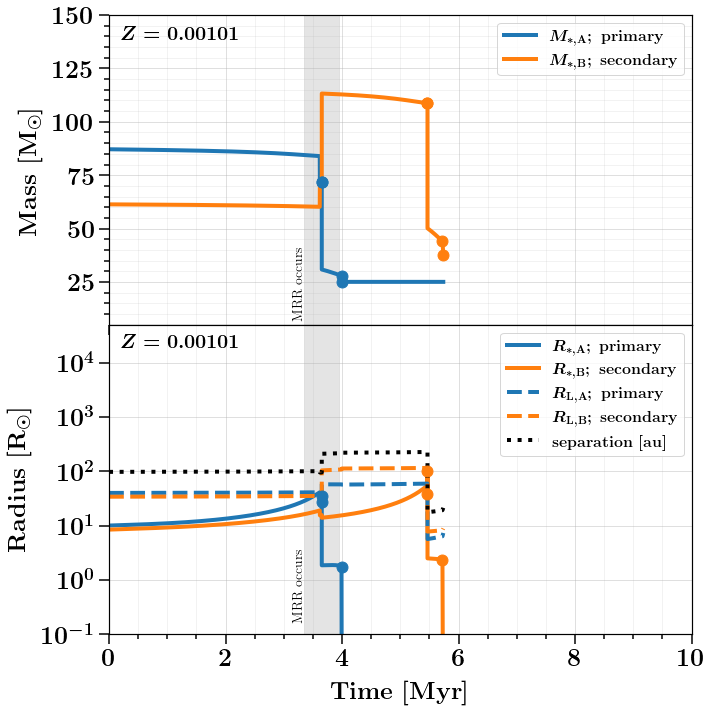

ST1: [1. 2. 7.]
ST2: [1. 2. 7.]
ST1: [1. 2. 7.]
ST2: [1. 2. 7.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


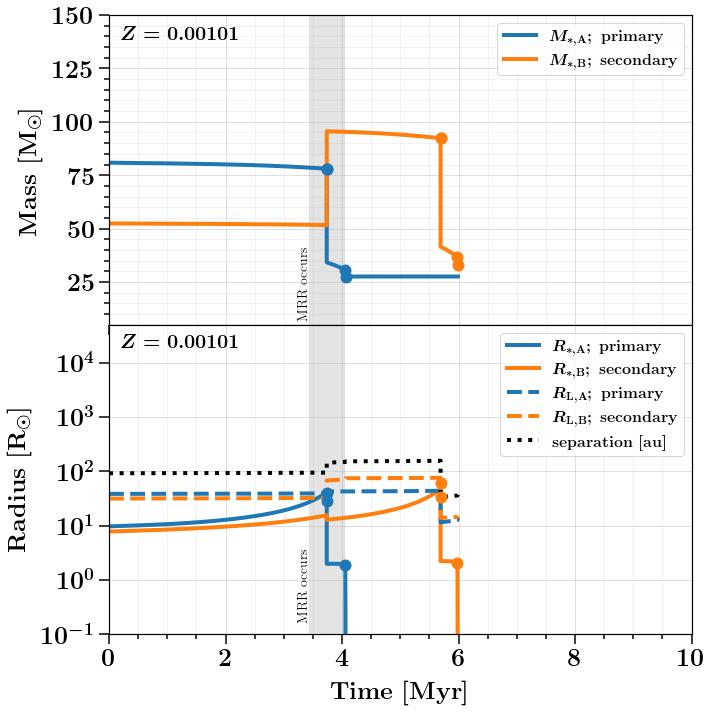

ST1: [1. 2. 7.]
ST2: [1. 2. 7.]
ST1: [1. 2. 7.]
ST2: [1. 2. 7.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


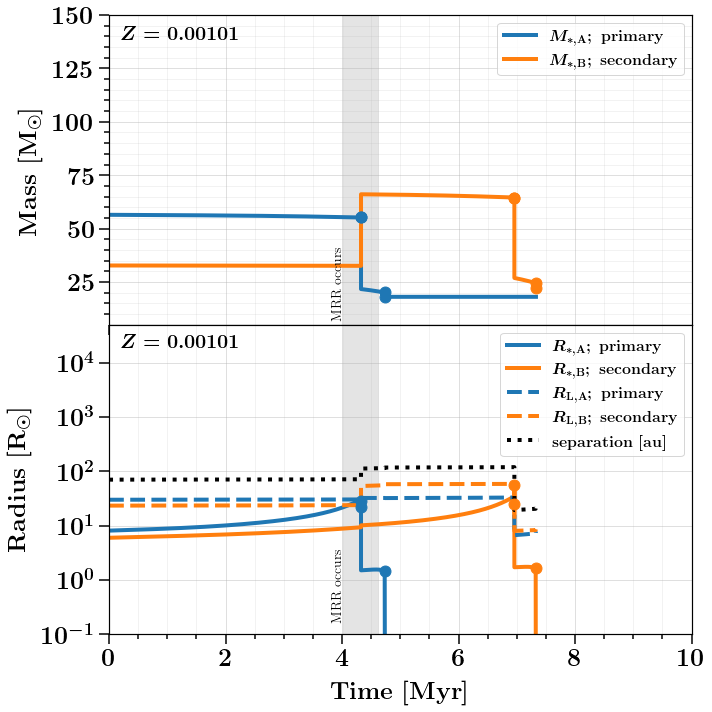

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 4. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 4. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


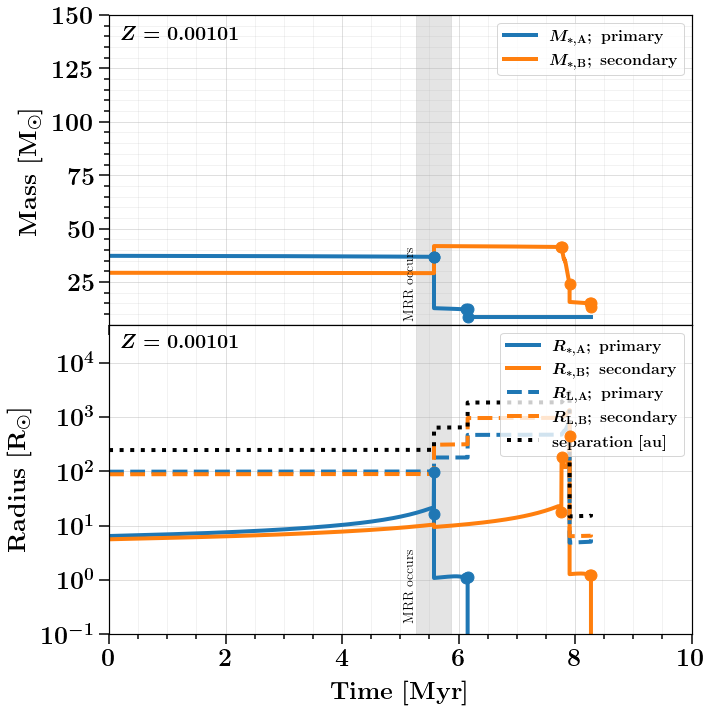

ST1: [1. 2. 4. 7. 8.]
ST2: [1. 2. 4. 7.]
ST1: [1. 2. 4. 7. 8.]
ST2: [1. 2. 4. 7.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


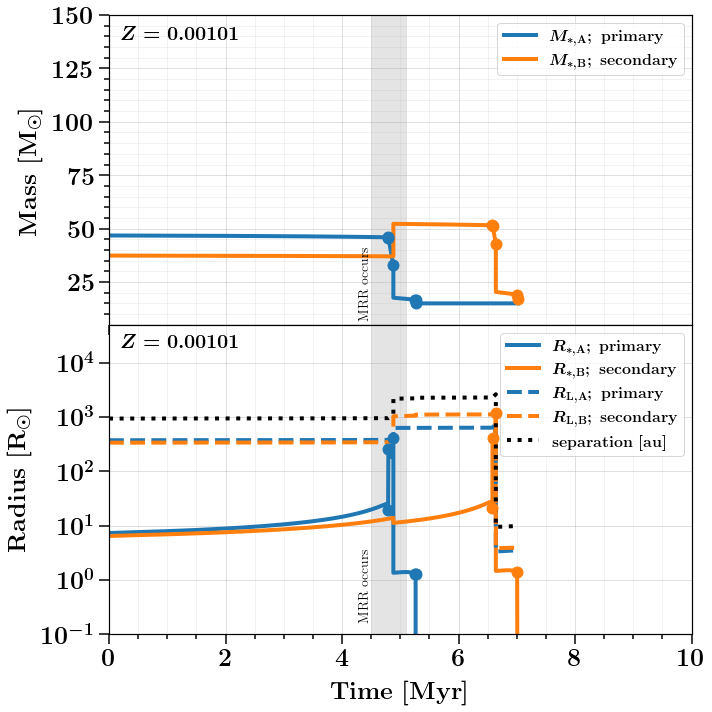

ST1: [1. 2. 4. 7. 8.]
ST2: [1. 2. 4. 7.]
ST1: [1. 2. 4. 7. 8.]
ST2: [1. 2. 4. 7.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


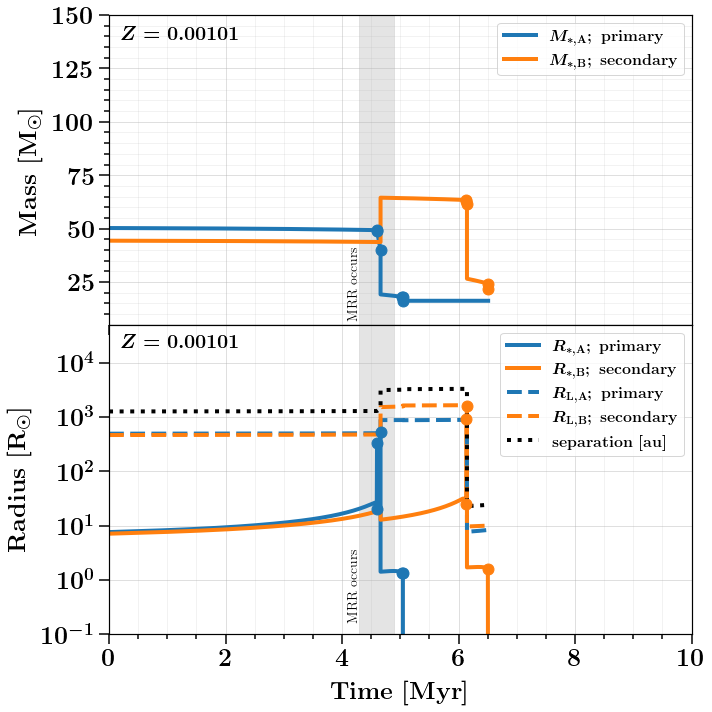

In [20]:
# solar like metallicity 

dirname ='fiducial'
metallicityList = [0.00101,0.00101]
for seed_ in [2105000139, 2105000482, 2105001147, 2105001534, 2105002537, 2105003108]:

    plotDetailedEvolutionPerPanel(seed=[seed_,seed_], x_m1=['mass1','Radius1'], x_m2=['mass2', 'Radius2'], ylabel=[r'Mass $[\rm{M}_{\odot}]$', r'Radius $[\rm{R}_{\odot}]$'],\
                                dirname=dirname, metallicityList=metallicityList)

#     plotDetailedEvolutionPerPanel(seed=[seed_,seed_], x_m1='mass1', x_m2='mass2', ylabel=r'Radius $[\rm{R}_{\odot}]$',\
#                                 dirname=dirname, metallicityList=metallicityList)

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


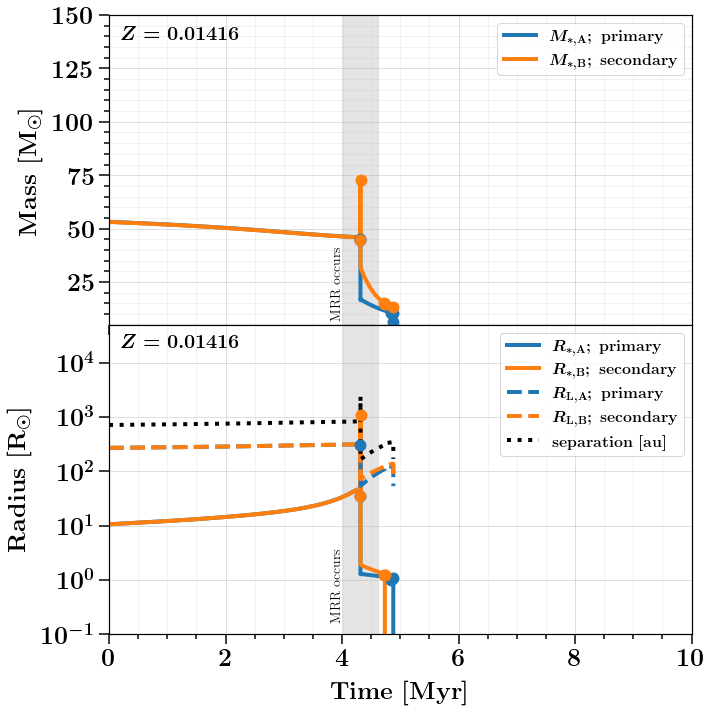

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


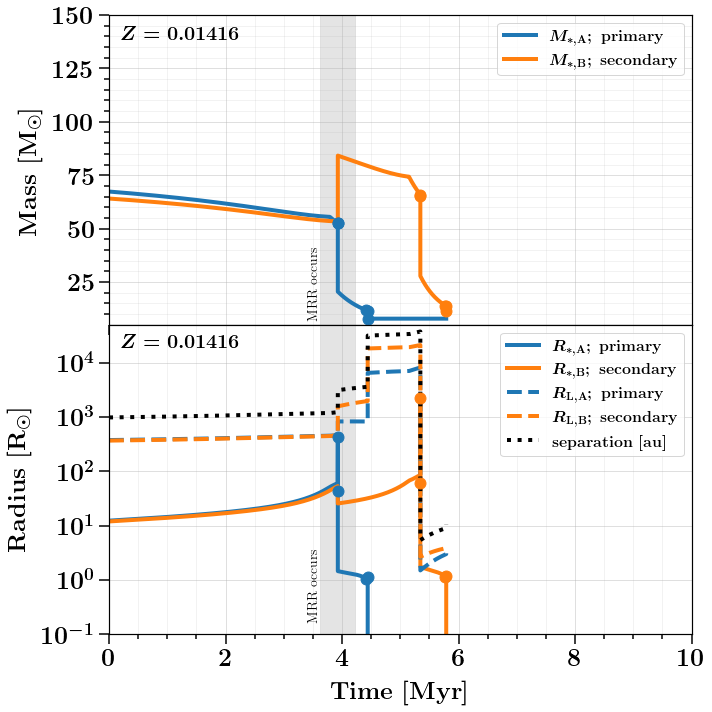

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


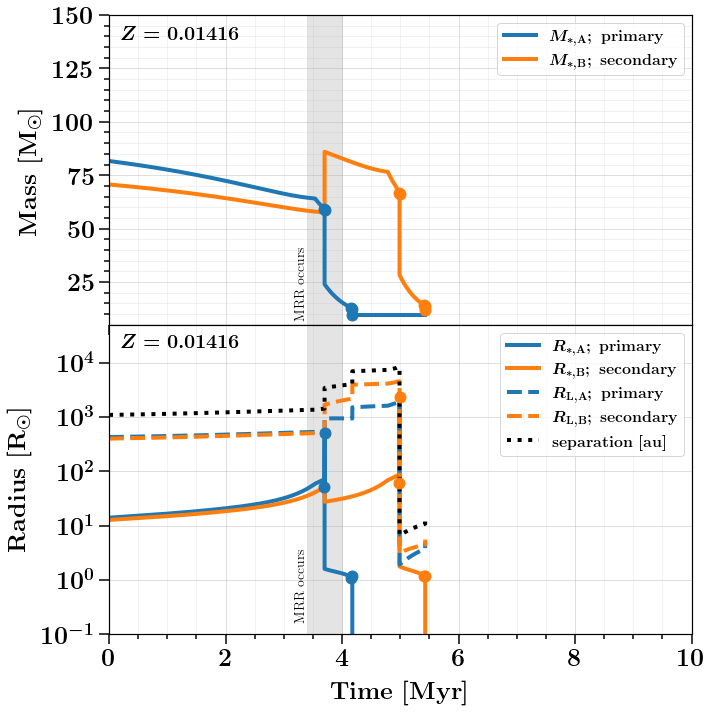

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


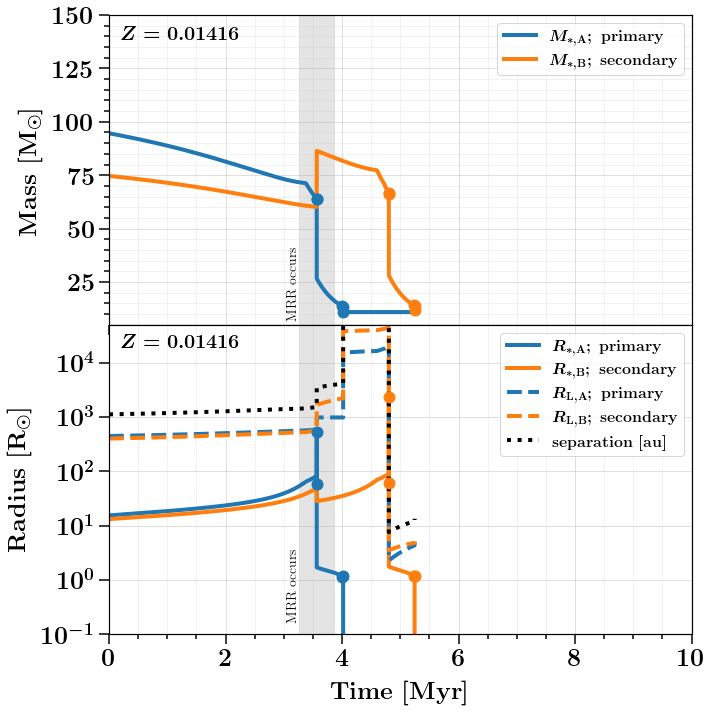

ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]
ST1: [1. 2. 7. 8.]
ST2: [1. 2. 7. 8.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: AutoMinorLocator does not work with logarithmic scale
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


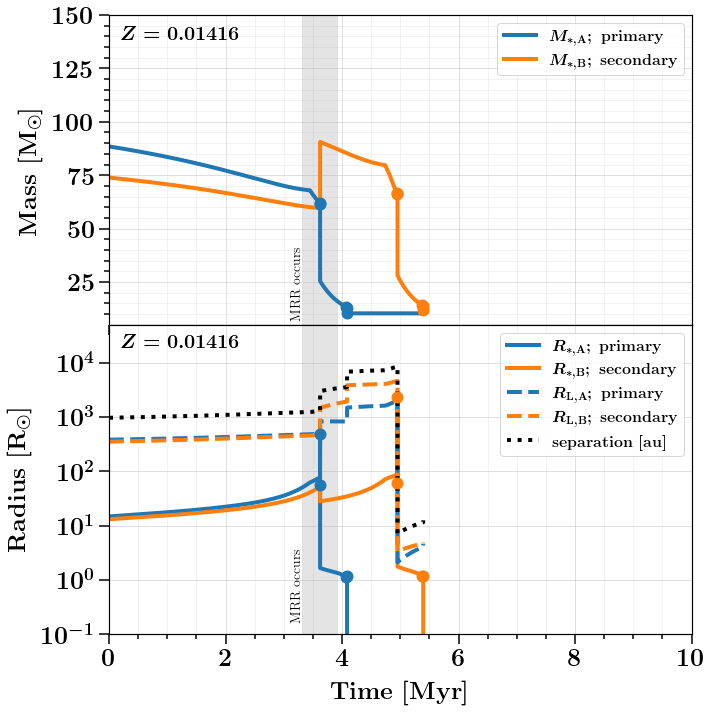

In [21]:
# solar like metallicity 

dirname ='fiducial'
metallicityList = [0.01416,0.01416]
for seed_ in [4505003997, 4505024245, 4540016235, 4525005018, 4525060549]:

    plotDetailedEvolutionPerPanel(seed=[seed_,seed_], x_m1=['mass1','Radius1'], x_m2=['mass2', 'Radius2'], ylabel=[r'Mass $[\rm{M}_{\odot}]$', r'Radius $[\rm{R}_{\odot}]$'],\
                                dirname=dirname, metallicityList=metallicityList)



In [10]:
dirname ='fiducial'
metallicityList = [0.00101,0.01416]
for seed in [4540016235]:

    plotDetailedEvolution2panel(seed=seed, x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$',\
                                dirname=dirname, metallicityList=metallicityList)



NameError: name 'plotDetailedEvolution2panel' is not defined

In [ ]:
# solar like metallicity 

dirname ='fiducial'
metallicityList = [0.00101,0.01416]
for seed in [4505024245]:

    plotDetailedEvolution2panel(seed=seed,x_m1='S1type' , x_m2='S2type', ylabel=r'Mass $[\rm{M}_{\odot}]$',\
                                dirname=dirname, metallicityList=metallicityList)



In [ ]:


# solar like metallicity 

dirname ='fiducial'
metallicity = 0.01416
for seed in [4505024245]:
    
    path = '../detailedEvolutionData/'+ dirname+'/Z_' + str(metallicity) +'/' + str(seed)
    dataDetailed = path + '/dataOutput_0.dat'

    plotDetailedEvolution(seed=seed, x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$', dirname=dirname, metallicity=metallicity, dataDetailed=dataDetailed)




In [ ]:
# solar like metallicity 

dirname ='fiducial'
metallicity = 0.00101
for seed in [4505003997, 4505024245, 4540016235, 4525005018]:
    
    path = '../detailedEvolutionData/'+ dirname+'/Z_' + str(metallicity) +'/' + str(seed)
    dataDetailed = path + '/dataOutput_0.dat'

    plotDetailedEvolution(seed=seed, x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$', dirname=dirname, metallicity=metallicity, dataDetailed=dataDetailed)

# detailedEvolutionData/fiducial/Z_0.00101/4505003997
# detailedEvolutionData/fiducial/Z_0.00101/4505003997/dataOutput_0.dat

In [ ]:
!ls ../detailedEvolutionData/fiducial

In [ ]:


# solar like metallicity 

dirname ='fiducial'
metallicity = 0.01416
for seed in [4505003997, 4505024245, 4540016235, 4525005018, 4525060549]:
    
    path = '../detailedEvolutionData/'+ dirname+'/Z_' + str(metallicity) +'/' + str(seed)
    dataDetailed = path + '/dataOutput_0.dat'

    plotDetailedEvolution(seed=seed, x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$', dirname=dirname, metallicity=metallicity, dataDetailed=dataDetailed)




In [ ]:
!ls ../detailedEvolutionData/fiducial/Z_0.01416



